In [1]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
palette = {'all_kfold': 'tab:blue', 'ts': 'tab:orange', 'all_nested': 'tab:green', 'fs_nested_pt_kfold': 'tab:red', 'fs_kfold_pt_nested': 'tab:purple'}

In [3]:
path = os.getcwd()
data_files = glob.glob(os.path.join(path, "overfitting_subgroups/output*"))

li = []
for filename in data_files:
    df = pd.read_csv(filename)
    li.append(df)


subgroup_df = pd.concat(li, axis=0, ignore_index=True)

new_names = dict([(i,'metric_'+ i) for i in subgroup_df.iloc[0:1,10:].columns.values])
subgroup_df.rename(columns=new_names, inplace=True)


subgroup_df = subgroup_df[subgroup_df['metric_accuracy'].notna()]
subgroup_df

,subgroup,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,metric_accuracy,metric_reference_accuracy
0,young,svm,accuracy,0.05,rfe,0.4,ts,0.6,NaN,2,0.600000,0.448087
1,young,svm,accuracy,0.05,rfe,0.4,ts,0.6,NaN,2,0.600000,0.448087
2,young,svm,accuracy,0.05,rfe,0.4,ts,0.6,NaN,2,0.600000,0.448087
3,young,svm,accuracy,0.05,rfe,0.4,ts,0.6,NaN,2,0.600000,0.448087
4,young,svm,accuracy,0.05,rfe,0.4,ts,0.6,NaN,2,0.600000,0.448087
...,...,...,...,...,...,...,...,...,...,...,...,...
101719,elder,logistic_regression,accuracy,1.00,rfe,1.0,all_kfold,NaN,NaN,13,0.833333,0.792350
101720,elder,logistic_regression,accuracy,1.00,rfe,1.0,all_kfold,NaN,NaN,13,0.842491,0.748634
101721,elder,logistic_regression,accuracy,1.00,rfe,1.0,all_kfold,NaN,NaN,13,0.838828,0.737705
101722,elder,logistic_regression,accuracy,1.00,rfe,1.0,all_kfold,NaN,NaN,13,0.822344,0.781421


In [19]:
selection = subgroup_df[
    (subgroup_df['feature_selection_frac'] == 0.7)
    & (subgroup_df['par_split_size'] == 13.0)
    & (subgroup_df['main_metric'] == 'accuracy')
    & ((subgroup_df['train_size'] == 0.8) | subgroup_df['train_size'].isna())
    & ((subgroup_df['cv_split_size'] == 13.0) | subgroup_df['cv_split_size'].isna())]

In [20]:
selection = selection.reset_index()

In [21]:
pivoted_subgroup = pd.wide_to_long(selection, stubnames='metric', i='index', j='metric_type', sep='_', suffix=r'\w+')
pivoted_subgroup.reset_index(inplace=True)
pivoted_subgroup = pivoted_subgroup.drop('index', axis=1)
pivoted_subgroup.rename(columns={'metric': 'metric_measurement'}, inplace=True)
pivoted_subgroup

,metric_type,validation_type,train_size,main_metric,subgroup,model,feature_selection_frac,sample_size,par_split_size,cv_split_size,feature_selector,metric_measurement
0,accuracy,all_kfold,NaN,accuracy,young,svm,0.7,0.1,13,NaN,rfe,0.961538
1,accuracy,all_kfold,NaN,accuracy,young,svm,0.7,0.1,13,NaN,rfe,0.653846
2,accuracy,all_kfold,NaN,accuracy,young,svm,0.7,0.1,13,NaN,rfe,0.846154
3,accuracy,all_kfold,NaN,accuracy,young,svm,0.7,0.1,13,NaN,rfe,1.000000
4,accuracy,all_kfold,NaN,accuracy,young,svm,0.7,0.1,13,NaN,rfe,0.884615
...,...,...,...,...,...,...,...,...,...,...,...,...
8195,reference_accuracy,all_kfold,NaN,accuracy,elder,logistic_regression,0.7,1.0,13,NaN,rfe,0.786885
8196,reference_accuracy,all_kfold,NaN,accuracy,elder,logistic_regression,0.7,1.0,13,NaN,rfe,0.748634
8197,reference_accuracy,all_kfold,NaN,accuracy,elder,logistic_regression,0.7,1.0,13,NaN,rfe,0.775956
8198,reference_accuracy,all_kfold,NaN,accuracy,elder,logistic_regression,0.7,1.0,13,NaN,rfe,0.814208


In [22]:
gf = pivoted_subgroup['subgroup'].replace({'young': 291 * 0.8, 'middle': 524 * 0.8, 'elder': 103 * 0.8})
r = pivoted_subgroup['sample_size'] * gf
pivoted_subgroup['sample_size'] = r
pivoted_subgroup

,metric_type,validation_type,train_size,main_metric,subgroup,model,feature_selection_frac,sample_size,par_split_size,cv_split_size,feature_selector,metric_measurement
0,accuracy,all_kfold,NaN,accuracy,young,svm,0.7,23.28,13,NaN,rfe,0.961538
1,accuracy,all_kfold,NaN,accuracy,young,svm,0.7,23.28,13,NaN,rfe,0.653846
2,accuracy,all_kfold,NaN,accuracy,young,svm,0.7,23.28,13,NaN,rfe,0.846154
3,accuracy,all_kfold,NaN,accuracy,young,svm,0.7,23.28,13,NaN,rfe,1.000000
4,accuracy,all_kfold,NaN,accuracy,young,svm,0.7,23.28,13,NaN,rfe,0.884615
...,...,...,...,...,...,...,...,...,...,...,...,...
8195,reference_accuracy,all_kfold,NaN,accuracy,elder,logistic_regression,0.7,82.40,13,NaN,rfe,0.786885
8196,reference_accuracy,all_kfold,NaN,accuracy,elder,logistic_regression,0.7,82.40,13,NaN,rfe,0.748634
8197,reference_accuracy,all_kfold,NaN,accuracy,elder,logistic_regression,0.7,82.40,13,NaN,rfe,0.775956
8198,reference_accuracy,all_kfold,NaN,accuracy,elder,logistic_regression,0.7,82.40,13,NaN,rfe,0.814208


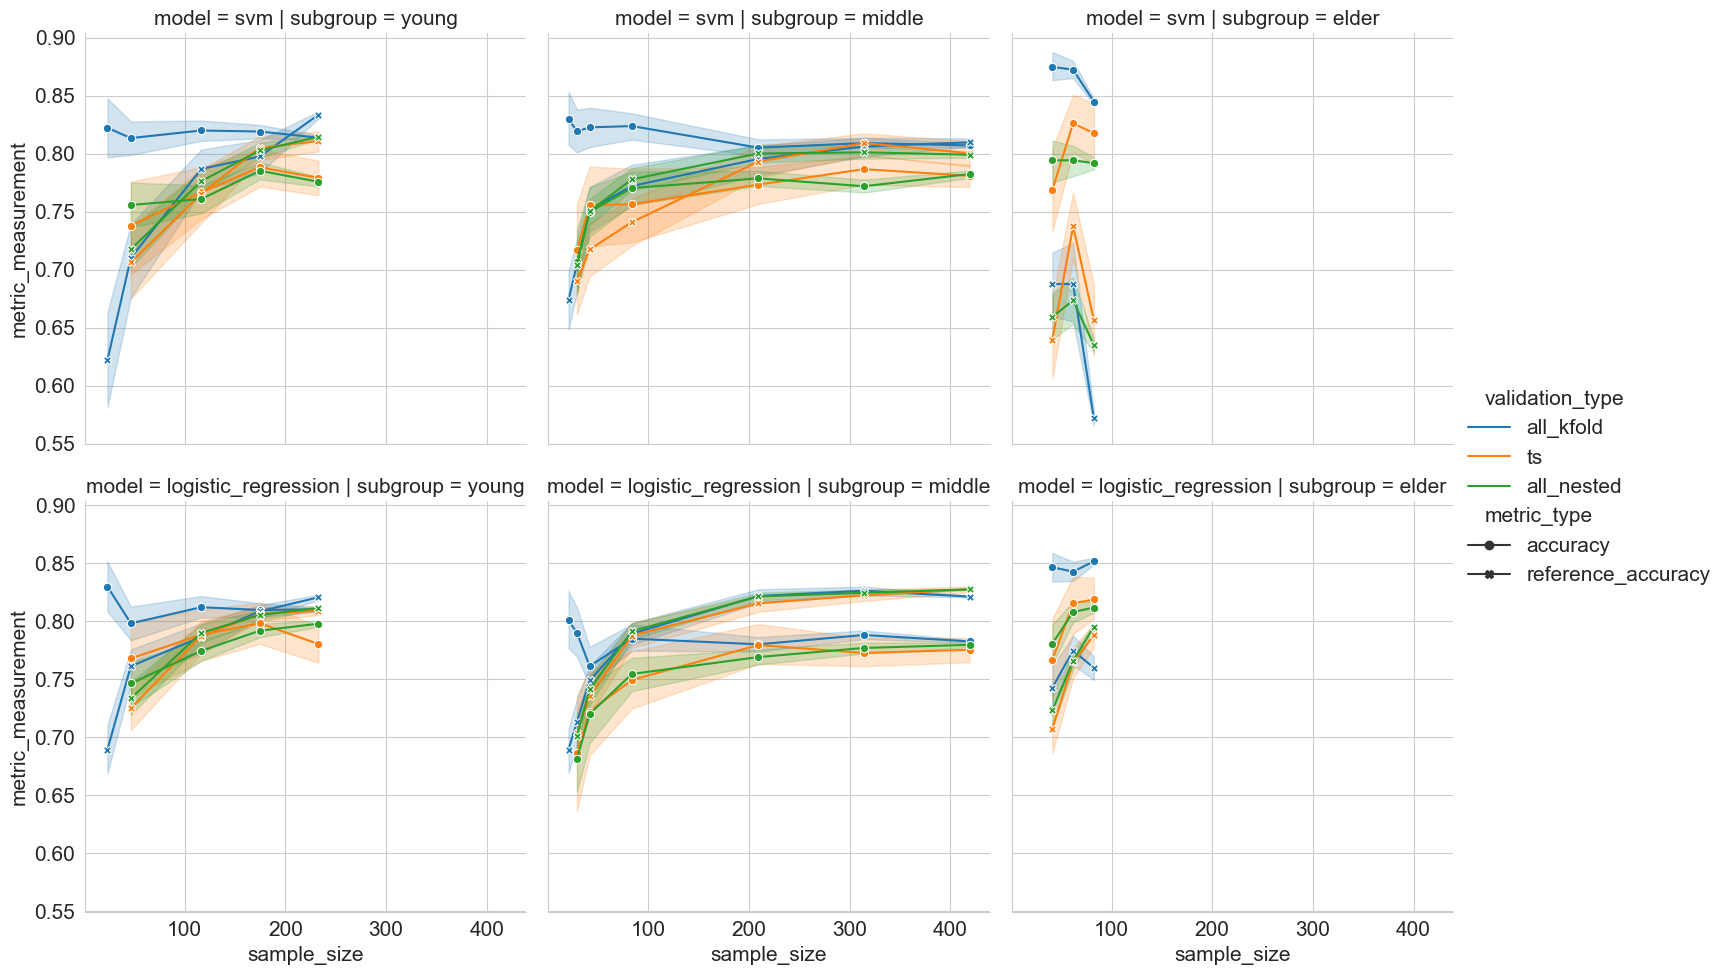

In [23]:
plt.rcParams.update({'font.size': 15})
sns.relplot(x='sample_size', data=pivoted_subgroup, hue='validation_type', kind='line', y='metric_measurement',  ci=95, row='model', col='subgroup', palette=palette, style='metric_type', markers=True, dashes=False)
plt.show()